In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array

import os
import numpy as np
import matplotlib.pyplot as plt


In [9]:
%matplotlib inline


In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Форма данных для обучения: {x_train.shape}")


Форма данных для обучения: (60000, 28, 28, 1)


In [11]:
model = Sequential(
    [
        # Первый слой свертки: ищет простые элементы (линии, углы)
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),  # Уменьшает картинку в 2 раза, оставляя главное
        # Второй слой свертки: ищет сложные элементы (дуги, петли)
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()


/home/pavel/Projects/detectnum/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Обучаем 10 эпох, 10% данных отщипываем для валидации
history = model.fit(
    x_train,
    y_train,
    epochs=7,
    validation_split=0.1,
)


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8831 - loss: 0.3657 - val_accuracy: 0.9827 - val_loss: 0.0641
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9571 - loss: 0.1413 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9684 - loss: 0.1036 - val_accuracy: 0.9895 - val_loss: 0.0365
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9719 - loss: 0.0910 - val_accuracy: 0.9892 - val_loss: 0.0366
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9765 - loss: 0.0749 - val_accuracy: 0.9912 - val_loss: 0.0320
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9791 - loss: 0.0657 - val_accuracy: 0.9912 - val_loss: 0.0315
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9809 - loss: 0.0592 - val_accuracy: 0.9910 - val_loss: 0.0301


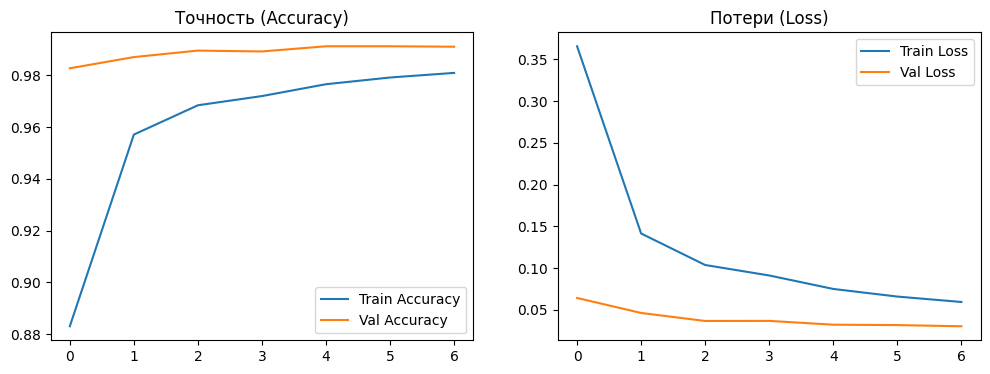

In [13]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend(loc="lower right")
plt.title("Точность (Accuracy)")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend(loc="upper right")
plt.title("Потери (Loss)")

plt.show()


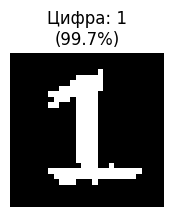

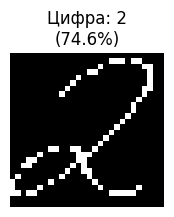

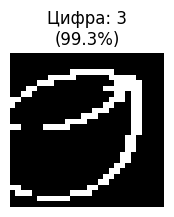

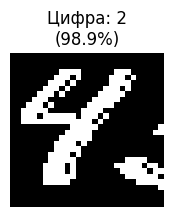

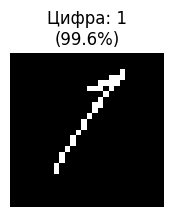

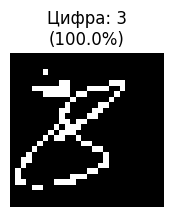

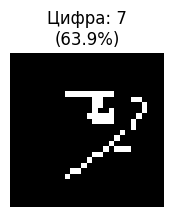

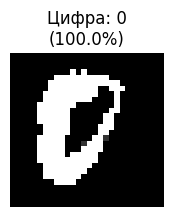

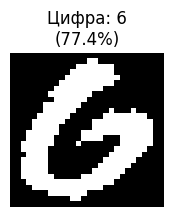

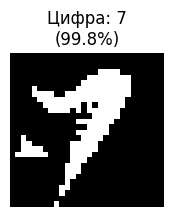

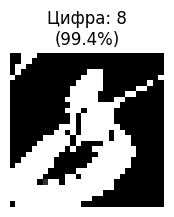

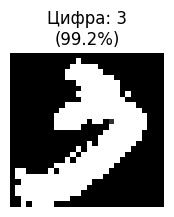

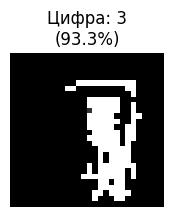

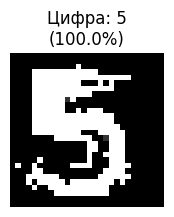

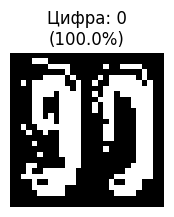

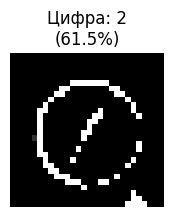

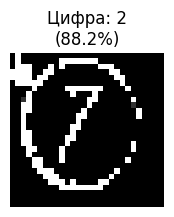

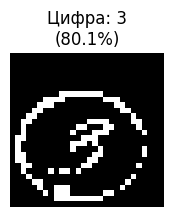

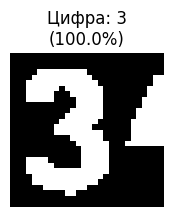

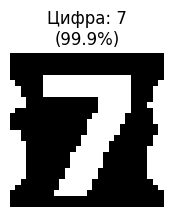

In [14]:
folder_path = "../attachments"

if os.path.exists(folder_path):
    files = [
        f
        for f in os.listdir(folder_path)
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ]

    for filename in files:
        path = os.path.join(folder_path, filename)

        img = load_img(path, color_mode="grayscale", target_size=(28, 28))
        img_array = img_to_array(img)

        if np.mean(img_array) > 100:
            img_array = 255.0 - img_array

        img_array[img_array < 50] = 0  # Шумы убираем
        img_array[img_array > 50] = 255  # Слабые линии делаем жирными

        model_input = img_array / 255.0
        model_input = model_input.reshape(1, 28, 28, 1)

        prediction = model.predict(model_input, verbose=0)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        plt.figure(figsize=(2, 2))
        plt.imshow(img_array.reshape(28, 28), cmap="gray")
        plt.title(f"Цифра: {predicted_digit}\n({confidence:.1f}%)")
        plt.axis("off")
        plt.show()
else:
    print("Папка не найдена")
